In [3]:
#realPower['2013-07-01 00']

In [26]:
import pandas as pd
import numpy as np

reactivePower=pd.read_csv('R3_12_47_1_AMI_residential_phase12_reactive_power.csv',skiprows=8)
realPower=pd.read_csv('R3_12_47_1_AMI_residential_phase12_real_power.csv',skiprows=8)

a=realPower.shape
a
type(a)
a[0]

realPower.head(5)

a=realPower.index

aa=realPower.ix[:,0:1]

type(aa)

type(aa[:1])

Create 15 minute interval of datetime array to retrive from the original data if it has minute by minute interval data

In [31]:
def dateArray15mins(data_array):
    from datetime import datetime, timedelta

    def datetime_range(start, end, delta):
        current = start
        while current < end:
            yield current
            current += delta

    dts = [dt.strftime('%Y-%m-%dT%H:%M:%S') for dt in 
           datetime_range((np.datetime64(data_array[1,0]).astype(datetime)),
                          (np.datetime64(data_array[len(data_array)-1,0]).astype(datetime)),
                          timedelta(minutes=15))]
    return dts

#d=dts[1]
#np.datetime64(d)

In [32]:
def ind15mins(data_array):
    ind=[0]
    ind.extend((np.arange(1,len(data_array),15)).tolist())
    new_array=data_array[ind,:]
    return new_array

In [35]:
newReactiveVoltage=ind15mins(reactiveVoltage)
newRealVoltage=ind15mins(realVoltage)

#d=dateArray15mins(realVdataArray)

In [174]:
rT=pd.DataFrame.transpose(reactivePower)
aa=rT.unstack()

In [2]:
#realPower.resample('30T').sum()

In [1]:
#realPower.resample('30T').mean()#,how='mean')

In [ ]:
def fun(x, t, y):
    return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y

In [32]:
aa=realPower.index[0].value
#datetime.fromtimestamp(float(aa)).isoformat()
#dat = dt.datetime.fromtimestamp(aa)#, timezone.utc)# / 1e3)
#type(aa)
print(aa)
bb=135699930
date.fromordinal(bb)
#dat

1356999300000000000


ValueError: year 371534 is out of range

In [61]:
date = datetime.fromtimestamp(aa / 1e3)

OSError: [Errno 22] Invalid argument

In [ ]:
cc=datetime.datetime.combine(weekends[1], datetime.time(0, 0))
print(type(cc))


In [103]:
weekdays=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==1 or day.isoweekday()==2 or day.isoweekday()==3 or day.isoweekday()==4 or day.isoweekday()==5)]
weekends=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==6 or day.isoweekday()==7)]
days=[]
days.append(weekdays)
days.append(weekends)

In [2]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as pyplot

In [3]:
#from datetime import datetime
import datetime

Function to convert CSV files to pandas DataFrame. Discarding the description sentences on top of each file

In [4]:
def csv2dataframe(fileName):
    newdata=[]
    with open(fileName,'r') as fileData:
        rowData = csv.reader(fileData, 
                           delimiter = ',', 
                           quotechar = '"')
        for data in rowData:
            if len(data)>2:
                newdata.append(data[0:3])
    data_array = np.asarray(newdata)
    return convertDateTime(data_array)

First Column of the array is datetime with 'PST' extension. This function strips timezone and converts it into numpy datetime64 format

In [5]:
def convertDateTime(data_array):
    firstCol=data_array[1:,0]
    stripFirstCol=[ele.rstrip(' PST') for ele in firstCol]
    
    dateTimeFirstCol=[np.datetime64(ele) for ele in stripFirstCol]
    data_array[1:,0]=dateTimeFirstCol
    data_frame=pd.DataFrame(data_array.reshape(len(data_array),-1))
    
    data_frame.index=data_frame[0]
    data_frame=data_frame.drop(data_frame.columns[0],axis=1)


    data_frame.columns=data_frame.iloc[0]
    data_frame=data_frame.drop(data_frame.index[0])
    
    data_frame=data_frame.astype(str).astype(float)
    data_frame.index=pd.to_datetime(data_frame.index)
    data_frame=data_frame.resample('15T').mean()
    data_frame=data_frame[1:]
    return data_frame

In [6]:
reactivePfile='R3_12_47_1_AMI_residential_phase12_reactive_power.csv'
realPfile='R3_12_47_1_AMI_residential_phase12_real_power.csv'
reactiveVfile='R3_12_47_1_AMI_residential_phase12_reactive_voltage.csv'
realVfile='R3_12_47_1_AMI_residential_phase12_real_voltage.csv'

In [7]:
reactivePower=csv2dataframe(reactivePfile)
realPower=csv2dataframe(realPfile)
reactiveVoltage=csv2dataframe(reactiveVfile)
realVoltage=csv2dataframe(realVfile)

In [112]:
reactiveP=reactivePower
realP=realPower
reactiveV=reactiveVoltage
realV=realVoltage

In [158]:
def getDateList(startDate,endDate):
    startDate=datetime.datetime.strptime(startDate,'%Y-%m-%d')
    #startDate=realPower.index[0]
    #startDate=startDate.date()

    endDate=datetime.datetime.strptime(endDate,'%Y-%m-%d')
    #endDate=realPower.index[len(realPower)-1]
    #endDate=endDate.date()

    numDays=endDate-startDate
    numDays=numDays.days

    date_list = [startDate + datetime.timedelta(days=x) for x in range(0, numDays)]
    return date_list

In [160]:
seasonDates=['2013-01-01','2013-03-01','2013-05-15']

In [109]:
def splitWDWE(data_frame,weekdays,weekends):
    weekdayResult=getDays(data_frame,weekdays)
    weekendResult=getDays(data_frame,weekends)
    return weekdayResult, weekendResult

In [110]:
def getDays(data_frame,days):
    result=data_frame[days[0]]
    for i in range(1,len(days)):
            result=result.append(data_frame[days[i]])
    return result

In [111]:
realPowerWD, realPowerWE= splitWDWE(realPower, weekdays, weekends)

CALCULATES THE REAL AND REACTIVE COEEFICIENTS OF WEEKDAYS AND WEEKENDS

In [166]:
realCoefficients=[]
reactiveCoefficients=[]

for j in range(0,len(seasonDates)-1):
    realPowerSeason=realP[seasonDates[j]:seasonDates[j+1]]
    realVoltageSeason=realV[seasonDates[j]:seasonDates[j+1]]
    reactivePowerSeason=reactiveP[seasonDates[j]:seasonDates[j+1]]
    reactiveVoltageSeason=reactiveV[seasonDates[j]:seasonDates[j+1]]
    date_list=getDateList(seasonDates[j],seasonDates[j+1])
    print("Season ",j+1)
    print(seasonDates[j])
    print(seasonDates[j+1])
    #print(date_list)  
    
    for i in (0,1):
        if i==0: #weekdays
            days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==1 or day.isoweekday()==2 or day.isoweekday()==3 or day.isoweekday()==4 or day.isoweekday()==5)]
            
        else: #weekends
            days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==6 or day.isoweekday()==7)]
            
        realPower=getDays(realPowerSeason,days)
        realVoltage=getDays(realVoltageSeason,days)
        reactivePower=getDays(reactivePowerSeason,days)
        reactiveVoltage=getDays(reactiveVoltageSeason,days)
        
        apparentVoltage=((realVoltage**2)+(reactiveVoltage**2))**0.5
        apparentPower=((realPower**2)+(reactivePower**2))**0.5
        independentVariable=apparentVoltage/240
    
        columnNames=independentVariable.columns

        x=independentVariable[columnNames[1]]
        x=x.values
    
        y1=realPower[columnNames[1]]
        y1=y1.values
        y2=reactivePower[columnNames[1]]
    
        coeff1=np.polyfit(x,y1,2)
        coeff2=np.polyfit(x,y2,2)

        realCoefficients.append(coeff1)
        reactiveCoefficients.append(coeff2)
    

Season  1
2013-01-01
2013-03-01
Season  2
2013-03-01
2013-05-15


In [162]:
realCoefficients

[array([ 56418.39758563, -98757.75375698,  42925.11893468]),
 array([ 3475702.93077801, -7187860.19625601,  3717362.33792123]),
 array([ 2149184.41204291, -4443127.09932144,  2297443.82072255]),
 array([ 376221.67062633, -782093.56634102,  407601.45582893])]

In [163]:
reactiveCoefficients

[array([ 14758.47149275, -26031.7761995 ,  11420.99567456]),
 array([  870188.19680072, -1799563.93174061,   930678.98787868]),
 array([  538578.6770475 , -1113433.20991234,   575731.93320586]),
 array([  93675.96147002, -194740.08063529,  101496.87145617])]

In [60]:
apparentVoltage=((realVoltage**2)+(reactiveVoltage**2))**0.5
apparentPower=((realPower**2)+(reactivePower**2))**0.5
independentVariable=apparentVoltage/240

In [61]:
columnNames=independentVariable.columns

x=independentVariable[columnNames[1]]
x=x.values
xaxis=apparentVoltage[columnNames[1]]
y1=realPower[columnNames[1]]
y1=y1.values
y2=reactivePower[columnNames[1]]

Polynomial Curve Fitting

In [67]:
coeff1=np.polyfit(x,y1,2)
print(coeff1)

coeff2=np.polyfit(x,y2,2)
print(coeff2)

[ 1522732.69278573 -3141978.95747259  1621872.81569396]
[ 382080.77344973 -788378.44524645  406956.44950509]


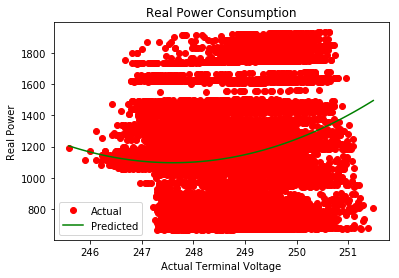

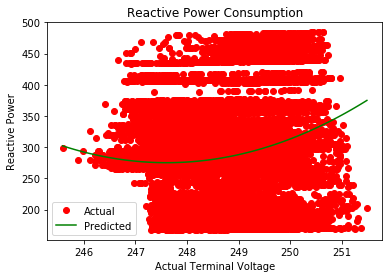

In [68]:
xx= np.linspace(x.min(),x.max(),100)
xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)

poly1=np.poly1d(coeff1)
fid,cx = pyplot.subplots()

cx.plot(xaxis,y1,'ro',label='Actual')
cx.plot(xxaxis,np.polyval(coeff1,xx),'-g',label='Predicted')

cx.legend()
cx.set_title('Real Power Consumption')
cx.set_xlabel('Actual Terminal Voltage')
cx.set_ylabel('Real Power')
pyplot.show()


poly2=np.poly1d(coeff2)
fid,cx = pyplot.subplots()

cx.plot(xaxis,y2,'ro',label='Actual')
cx.plot(xxaxis,poly2(xx),'-g',label='Predicted')

cx.legend()
cx.set_title('Reactive Power Consumption')
cx.set_xlabel('Actual Terminal Voltage')
cx.set_ylabel('Reactive Power')
pyplot.show()

Gaussian Function Curve Fitting model

In [37]:
from numpy import sqrt, pi, exp, linspace, random

In [38]:
def gaussian(x, amp, cen, wid):
   return amp * exp(-(x-cen)**2 /wid)
#(amp/(sqrt(2*pi)*wid)) * exp(-(x-cen)**2 /(2*wid**2))
#amp * exp(-(x-cen)**2 /wid)

In [39]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

In [40]:
def residuals(coeffs, y, t):
     return y - model(t, coeffs)

In [41]:
def model(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp( - ((t-coeffs[2])/coeffs[3])**2 )

In [42]:
def myfunc(x,a,b,c):
    return (a*(x)**2)+b*x+c

In [43]:
from scipy.optimize import curve_fit

In [46]:
#x = linspace(-10,10, 101)
#ynew = gaussian(x, 2.33, 0.21, 1.51) + random.normal(0, 0.2, len(x))

#init_vals = [1, 0, 1]     # for [amp, cen, wid]
coefficient1, covar = curve_fit(gaussian, x, y1,maxfev=8000)#,method='lm',p0=init_vals)
coefficient2, covar = curve_fit(gaussian, x, y2,maxfev=8000)#,method='lm',p0=init_vals)
print (coefficient1)
print (coefficient2)

[  6.74958948e+07   2.68357743e+00   2.47127695e-01]
[  1.74639656e+07   2.68672133e+00   2.47359275e-01]


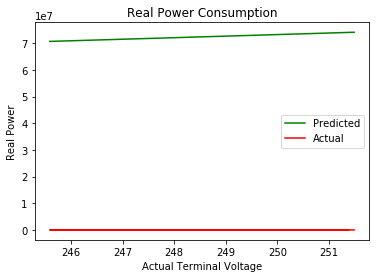

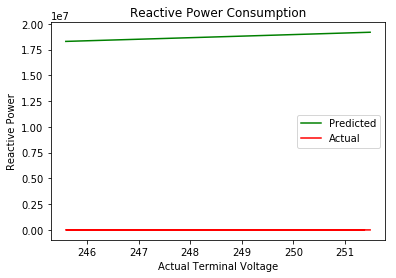

In [47]:
xx= np.linspace(x.min(),x.max(),100)
xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)


polynomial1=np.poly1d(coefficient1)

fid,cx = pyplot.subplots()
cx.plot(xxaxis,polynomial1(xx),'-g',label='Predicted')
cx.plot(xaxis,y1,'-r',label='Actual')
cx.legend()
cx.set_title('Real Power Consumption')
cx.set_xlabel('Actual Terminal Voltage')
cx.set_ylabel('Real Power')
pyplot.show()



polynomial2=np.poly1d(coefficient2)
xx= np.linspace(x.min(),x.max(),100)
xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)

fid,cx = pyplot.subplots()
cx.plot(xxaxis,polynomial2(xx),'-g',label='Predicted')
cx.plot(xaxis,y2,'-r',label='Actual')
cx.legend()
cx.set_title('Reactive Power Consumption')
cx.set_xlabel('Actual Terminal Voltage')
cx.set_ylabel('Reactive Power')
pyplot.show()